['aisoco-vec', 'aisoco-doc2vec']
[0.70406667 0.70666667 0.71106667 0.70813333 0.71426667]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        75
           1       1.00      0.96      0.98        75
           2       0.40      0.53      0.46        75
           3       0.99      0.88      0.93        75
           4       0.37      0.56      0.45        75
           5       0.44      0.53      0.48        75
           6       0.89      0.76      0.82        75
           7       0.99      0.93      0.96        75
           8       0.80      0.92      0.86        75
           9       1.00      1.00      1.00        75
          10       0.58      0.63      0.60        75
          11       1.00      0.97      0.99        75
          12       0.22      0.60      0.32        75
          13       0.55      0.56      0.55        75
          14       0.93      0.76      0.84        75
          15       0.97

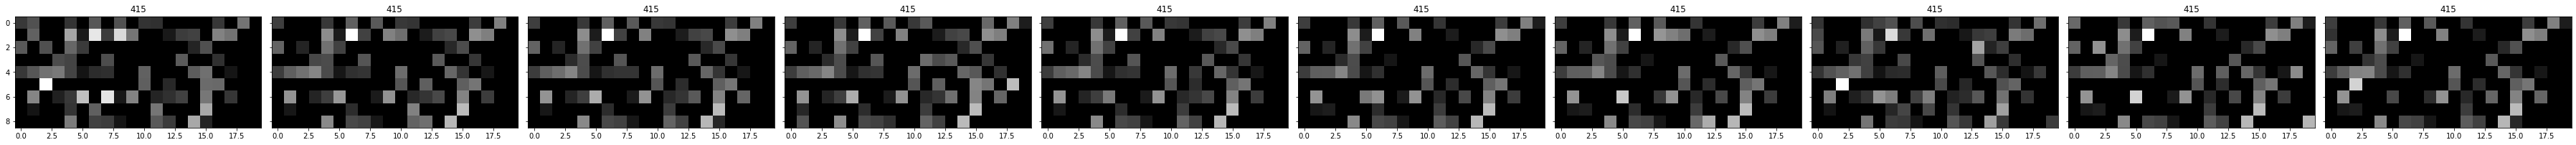

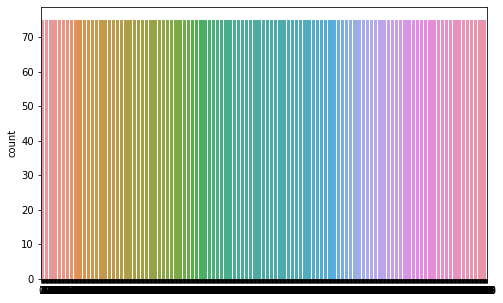

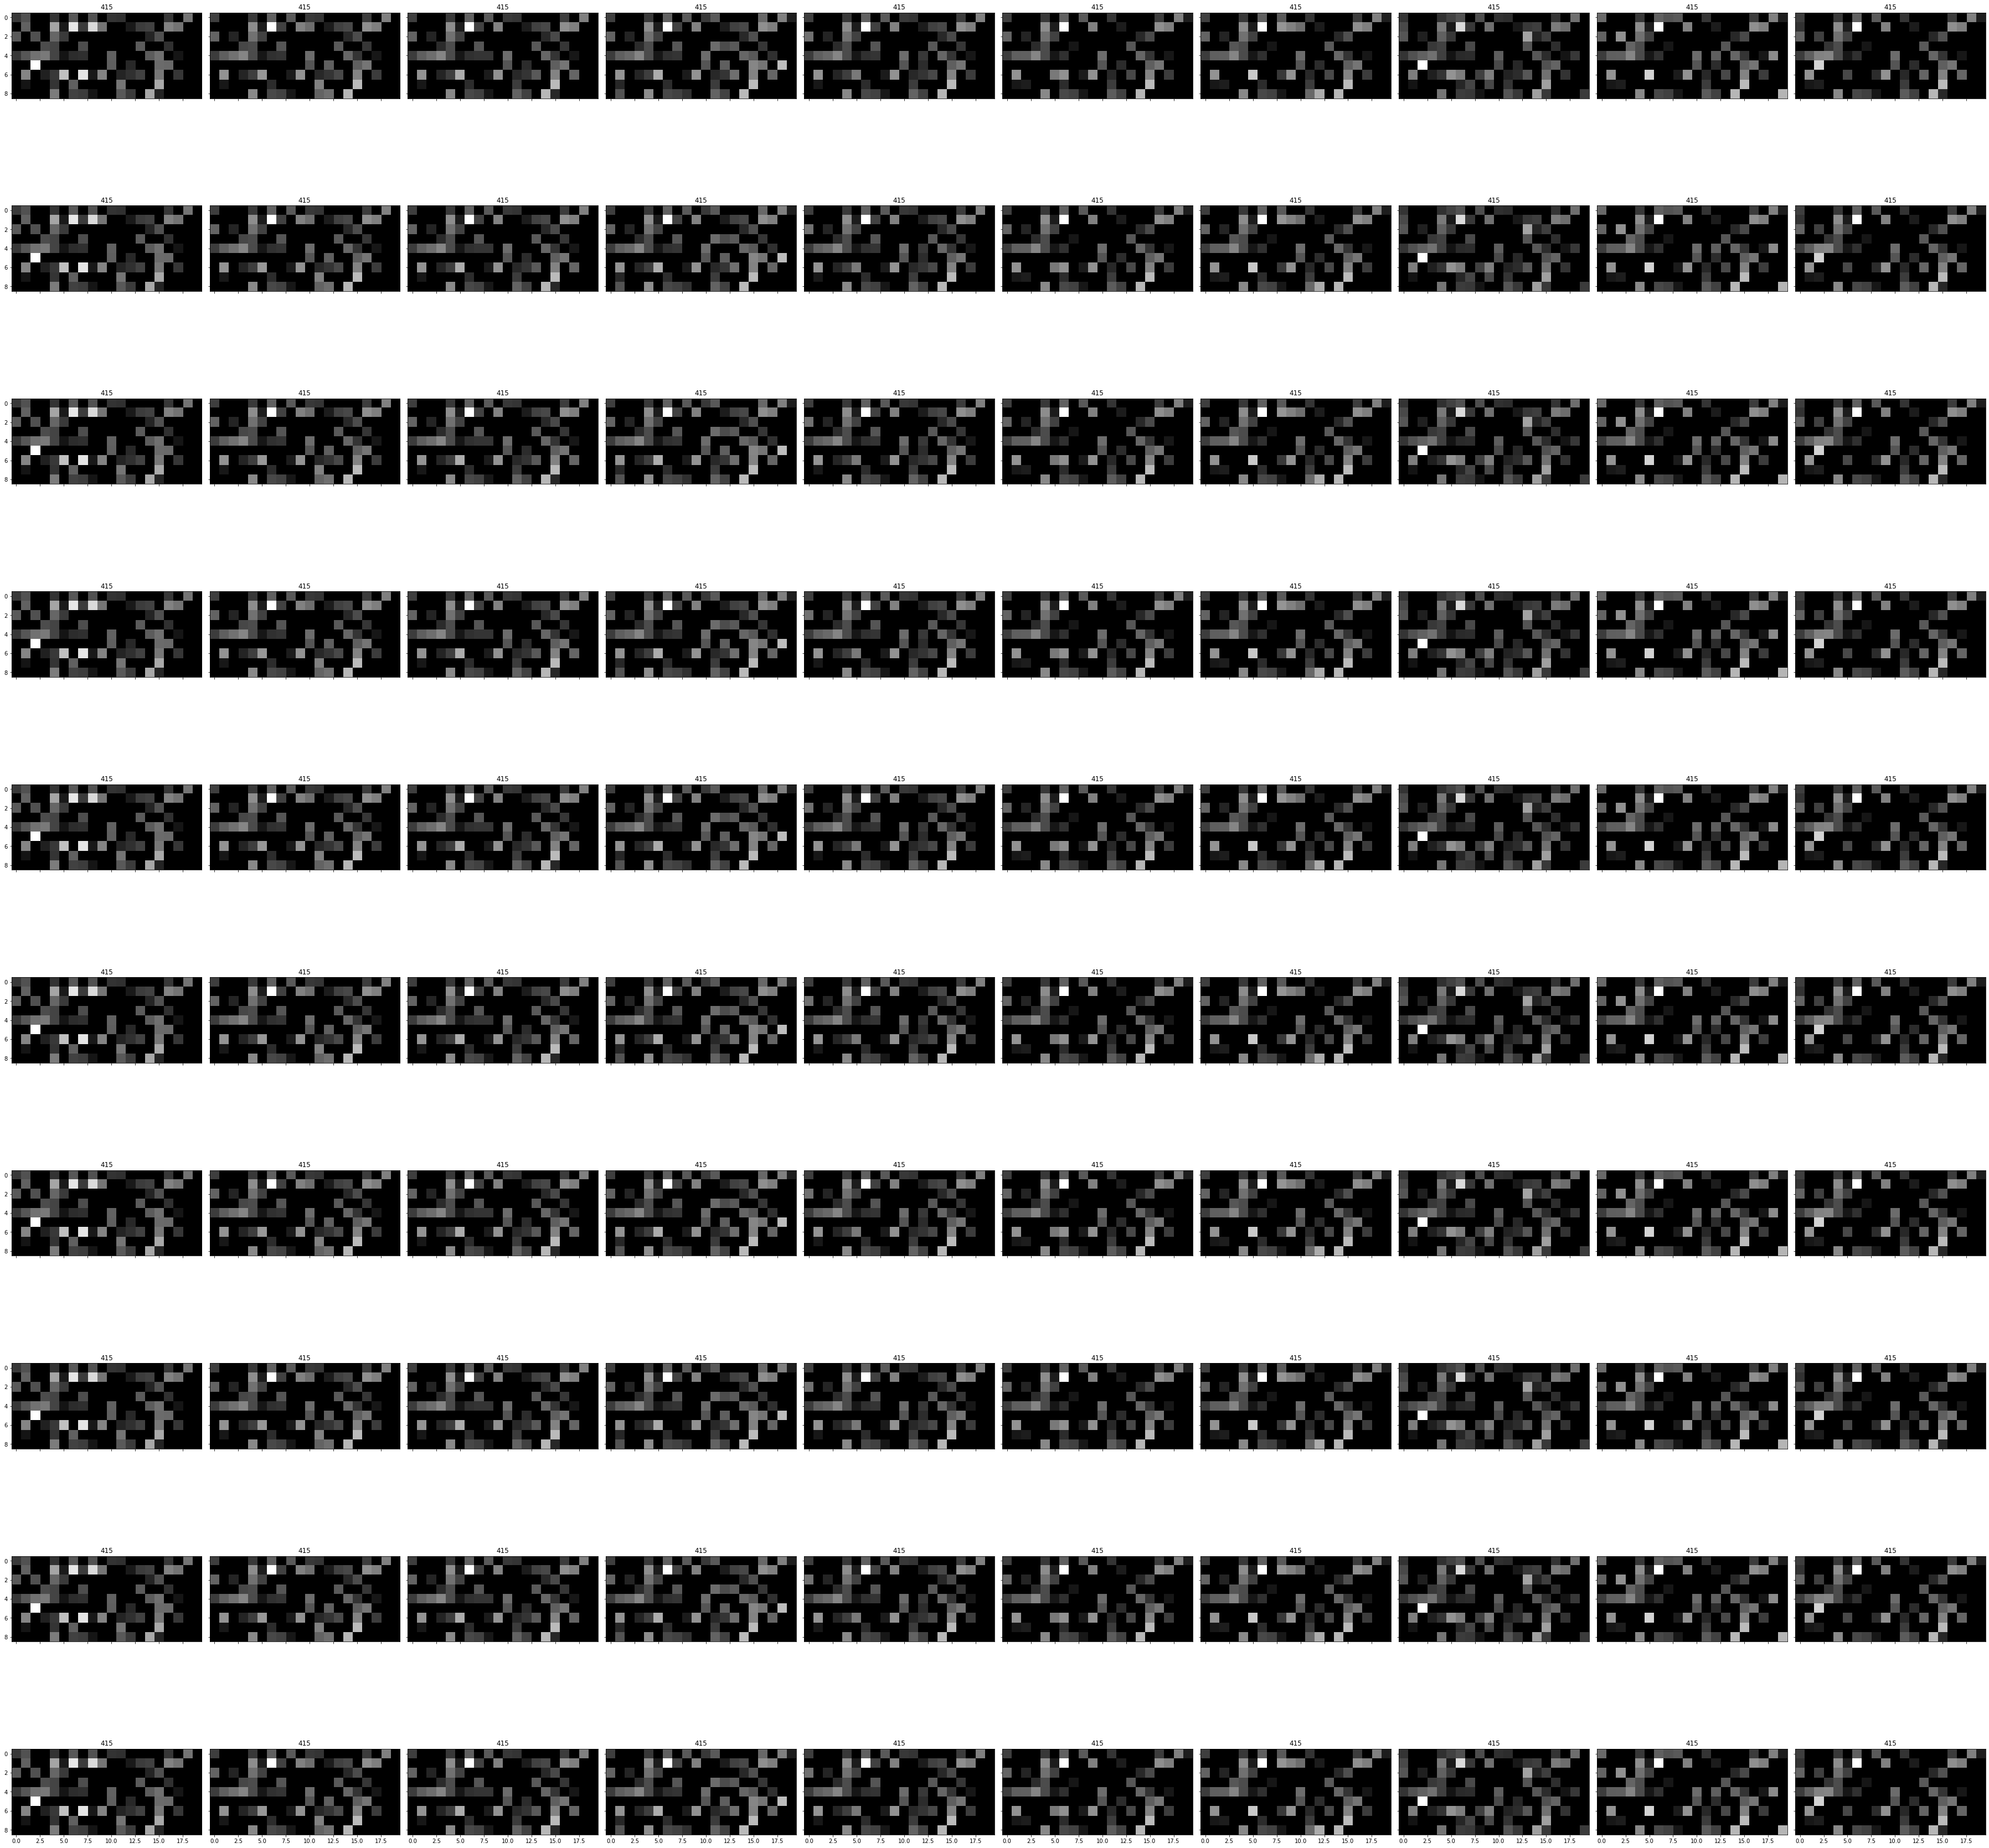

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import os
import re
print(os.listdir("../input"))


img_rows, img_cols = 28, 28

np.random.seed(5)
#rn.seed(5)
#tf.set_random_seed(5)

def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    
doc = np.load('../input/aisoco-doc2vec/doc2vec.npy')
y = np.load('../input/aisoco-vec/labels.npy')
X = doc


fig, axs = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(50,50))
axs = axs.flatten()
for i in range(0,10):
    im = X[i]
    im = im.reshape(-1,9,20,1)
    axs[i].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[i].set_title(y[i])
plt.tight_layout()    
X_train = X
y_train = y
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(y)

li_idxs = []
for i in range(10):
    for nr in range(10):
        ix = y[y==nr][i]
        li_idxs.append(ix) 
        

fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(50,50))
axs = axs.flatten()
for n, i in enumerate(li_idxs):
    im = X[i]
    im = im.reshape(-1,9,20,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(y[i])
plt.tight_layout()    


from sklearn.svm import SVC
clf_svm = SVC(C=7, gamma=0.08, kernel='rbf', random_state=0)
print(cross_val_score(clf_svm, X, y, cv=5))
clf_svm.fit(X_train,y_train)
pred_val_svm = clf_svm.predict(X_train)
acc_svm = print_validation_report(y, pred_val_svm)